<a href="https://colab.research.google.com/github/Feofan2021/MO/blob/main/%D0%9A%D0%B0%D0%B7%D0%B0%D0%BD%D1%86%D0%B5%D0%B2_%D0%A4%D0%B5%D0%BE%D1%84%D0%B0%D0%BD_%D0%9A%D0%9C_82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Курсова робота на тему "Метод Девідона-Флетчера-Пауелла"**
# Казанцева Феофана, групи КМ-82

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy.printing import latex as L
from IPython.display import display, Markdown, Math, Image
def printm(expression):
    return display(Math(expression))
def printraw(expression):
    return display(Markdown(expression))

Мінімізувати функцію $f(x) = 6(x_1-n)^2 + x_1 x_2 + 2x_2^2$<br>
Початкова функція $x^{(0)} = \begin{pmatrix} 1.3n+5 \\ 1.3n+5 \end{pmatrix}$<br>
$S^{(1)} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$<br><br>
$S^{(2)} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

In [ ]:
n = 14
S1 = Matrix([[1], [0]])
S2 = Matrix([[0], [1]])
x1, x2, lmbd = sp.symbols('x1 x2 \lambda')
f = 6*(x1 - n)**2 + x1*x2 + 2*x2**2
printm(r'f(x) =' + L(f))

<IPython.core.display.Math object>

In [ ]:
X0 = Matrix([[1.3*n + 5], [1.3*n + 5]])
printm(r'x^{(0)} =' + L(X0))

<IPython.core.display.Math object>

$$ \lambda_k = - \frac{\nabla^T f(\bar{x}^{(k)}) S^{(k)}}{S^{(k) T} H(\bar{x}^{(k)}) S^{(k)}} $$

In [ ]:
#grad = Matrix([
#    [sp.diff(f, x1).subs({x1: x0[0], x2: x0[1]})],
#    [sp.diff(f, x2).subs({x1: x0[0], x2: x0[1]})]
#])
#S = Matrix([[0], [1]])
#- (grad.T * S)[0] / (S.T * sp.hessian(f, [x1, x2]) * S)[0]
#printm(r'\nabla f(\bar{x}) = ' + L(grad))

## Ітерація 1

In [ ]:
printm(r'x^{(1)} = x^{(0)} + \lambda_0 S^{(2)}')
printm(r'x^{(1)} = ' + L(X0) + r'+ \lambda' + L(S2))
printm(r'x^{(1)} = ' + L(X0 + lmbd * S2))
x11, x12 = X0 + lmbd * S2
printm(r'x_1^{(1)} = ' + L(x11))
printm(r'x_2^{(1)} = ' + L(x12))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Алгоритм Свена та метод дихотомії

In [ ]:
def f_value(x1_value, x2_value):
    return f.subs({x1: x1_value, x2: x2_value})

def sven(x0, S, barwidth=0.3, dsk=False):
    h_sven = round(0.1 * abs(x0.norm() / S.norm()), 4)
    lmbd0 = 0
    fx0 = f_value(x11.subs(lmbd, lmbd0), x12.subs(lmbd, lmbd0))
    fx_positive_direction = f_value(x11.subs(lmbd, lmbd0 + h_sven), x12.subs(lmbd, lmbd0 + h_sven))
    fx_negative_direction = f_value(x11.subs(lmbd, lmbd0 - h_sven), x12.subs(lmbd, lmbd0 - h_sven))
    while fx0 < fx_positive_direction and fx0 < fx_negative_direction:
        h_sven = h_sven / 5
        fx_positive_direction = f_value(x11.subs(lmbd, lmbd0 + h_sven), x12.subs(lmbd, lmbd0 + h_sven))
        fx_negative_direction = f_value(x11.subs(lmbd, lmbd0 - h_sven), x12.subs(lmbd, lmbd0 - h_sven))
    printm(r'\Delta \lambda = ' + str(h_sven))
    direction = 1
    dir_str = '+'
    if fx_positive_direction > fx_negative_direction:
        direction = -1
        dir_str = '-'

    lmbdarray_sven = []
    fxarray_sven = []
    lmbd_sven = lmbd0
    fx_sven = f_value(x11.subs(lmbd, lmbd_sven), x12.subs(lmbd, lmbd_sven))
    k_sven = 0

    lmbdarray_sven.append(round(float(lmbd_sven), 4))
    fxarray_sven.append(round(float(fx_sven), 4))
    
    indx = 1
    while True:
        lmbd_sven = lmbd_sven + direction*h_sven*(2**k_sven)
        fx_sven = f_value(x11.subs(lmbd, lmbd_sven), x12.subs(lmbd, lmbd_sven))
        x_expr = f'x_{indx} = x_{indx-1}' + dir_str + str(2**k_sven) + r'\Delta =' + str(lmbd_sven)
        fx_expr = f'f(x_{indx}) = ' + str(round(fx_sven, 4))
        printm(x_expr + r'\quad ' + fx_expr)
        lmbdarray_sven.append(round(float(lmbd_sven), 4))
        fxarray_sven.append(round(float(fx_sven), 4))
        if fxarray_sven[-1] > fxarray_sven[-2]:
            # значення функції почало рости, тому припиняємо пошук
            break
        indx += 1
        k_sven += 1

    lmbdbackward_sven = round((lmbdarray_sven[-1] + lmbdarray_sven[-2]) / 2, 4)
    fxbackward_sven = round(f_value(x11.subs(lmbd, lmbdbackward_sven), x12.subs(lmbd, lmbdbackward_sven)), 4)
    xback_expr = f'x_{indx+1} = ' + r'\frac{' + f'x_{indx-1} + x_{indx}' + r'}{2} = ' + str(lmbdbackward_sven)
    fxback_expr = f'f(x_{indx+1}) = {fxbackward_sven}'
    printm(xback_expr + '\quad ' + fxback_expr)
    interval = [lmbdarray_sven[-3], lmbdbackward_sven]

    printm(r'Інтервал \ невизначенності \ за \ Свеном: ' + str(interval))
    plt.bar([lmbdarray_sven[0]], [fxarray_sven[0]], width=barwidth, color='r')
    ax = plt.gca()
    ax.bar([lmbdbackward_sven], [fxbackward_sven], width=barwidth, color='g')
    ax.bar(lmbdarray_sven[:0:-1], fxarray_sven[:0:-1], width=barwidth, color='b')

    plt.gcf().set_size_inches((14, 7))
    _ = plt.xticks(lmbdarray_sven[:-1] + [lmbdbackward_sven] + [lmbdarray_sven[-1]])
    
    if dsk:
        interval.insert(1, lmbdarray_sven[-2])
        return interval, [fxbackward_sven, fxarray_sven[-2], fxarray_sven[-3]]
    return interval

In [ ]:
def check_dichotomy(intervals, error):
    L_dich = intervals[-1] - intervals[0]
    if abs(L_dich) < error:
        printm(r'|L| = ' + str(abs(L_dich)) + '< 0.01')
        return True
    else:
        return False

def dichotomy(interval, eps):
    a, b = interval
    xm_dich = (a + b) / 2
    x1_dich = (a + xm_dich) / 2
    x2_dich = (xm_dich + b) / 2
    intervals_dich = [a, x1_dich, xm_dich, x2_dich, b]
    while True:
        a, x1_dich, xm_dich, x2_dich, b = intervals_dich 
        fxm_dich = f_value(x11.subs(lmbd, xm_dich), x12.subs(lmbd, xm_dich))
        fx1_dich = f_value(x11.subs(lmbd, x1_dich), x12.subs(lmbd, x1_dich))
        fx2_dich = f_value(x11.subs(lmbd, x2_dich), x12.subs(lmbd, x2_dich))
        printm(r'x_1 ='+L(round(x1_dich, 4))+r'\quad '+r'x_m ='+L(round(xm_dich, 4))+r'\quad ' r'x_2 = '+L(round(x2_dich, 4)))
        if fx1_dich < fxm_dich:
            intervals_dich = intervals_dich[:-2]
        else:
            if fx2_dich < fxm_dich:
                intervals_dich = intervals_dich[2:]
            else:
                intervals_dich = intervals_dich[1:-1]
        if check_dichotomy(intervals_dich, eps):
            break
        else:
            a, xm, b = intervals_dich
            xm_dich = (a + b) / 2
            x1_dich = (a + xm_dich) / 2
            x2_dich = (xm_dich + b) / 2
            intervals_dich = [a, x1_dich, xm_dich, x2_dich, b]
    return intervals_dich

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

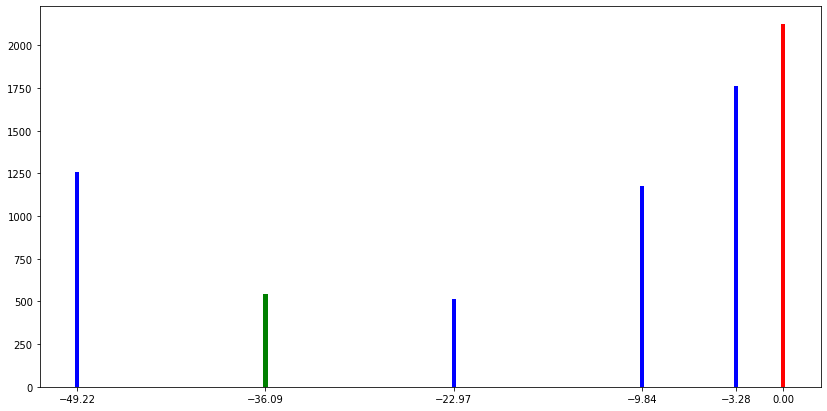

In [ ]:
interval = sven(x0=X0, S=S2)

In [ ]:
dich_1 = dichotomy(interval=interval, eps=0.01)
lmbd_1 = dich_1[1]
printm('\lambda_0 = ' + str(lmbd_1))
X1 = Matrix([
    [round(x11.subs(lmbd, lmbd_1), 4)],
    [round(x12.subs(lmbd, lmbd_1), 4)]
])
printm('x^{(1)} = ' + L(X1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Метод золотого перетину

In [ ]:
def check_gold(L_gold, error):
    if abs(L_gold) <= error:
        printm(r'|L| = ' + str(abs(L_gold)) + '< 0.01')
        return True
    else:
        return False

def golden_section(interval, eps):
    a, b = interval
    L_gold = b - a
    x1_gold = a + 0.382*L_gold
    x2_gold = a + 0.618*L_gold
    fx1_gold = f_value(x11.subs(lmbd, x1_gold), x12.subs(lmbd, x1_gold))
    fx2_gold = f_value(x11.subs(lmbd, x2_gold), x12.subs(lmbd, x2_gold))
    while True:
        printm(r'x_1 ='+L(round(x1_gold, 4))+r'\quad '+r'x_2 ='+L(round(x2_gold, 4)))
        if fx1_gold <= fx2_gold:
            b = x2_gold
            L_gold = b - a
            x2_gold = x1_gold
            x1_gold = a + 0.382*L_gold
        else:
            a = x1_gold
            L_gold = b - a
            x1_gold = x2_gold
            x2_gold = a + 0.618*L_gold

        if check_gold(L_gold, eps):
            if fx1_gold < fx2_gold:
                answ = x1_gold
            else:
                answ = x2_gold
            break
        else:
            fx1_gold = f_value(x11.subs(lmbd, x1_gold), x12.subs(lmbd, x1_gold))
            fx2_gold = f_value(x11.subs(lmbd, x2_gold), x12.subs(lmbd, x2_gold))
    return answ

In [ ]:
printm(r'x^{(2)} = x^{(1)} + \lambda_1 S^{(1)}')
printm(r'x^{(2)} = ' + L(X1) + r'+ \lambda_1' + L(S1))
printm(r'x^{(2)} = ' + L(X1 + lmbd * S1))
x11, x12 = X1 + lmbd * S1
printm(r'x_1^{(2)} = ' + L(x11))
printm(r'x_2^{(2)} = ' + L(x12))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

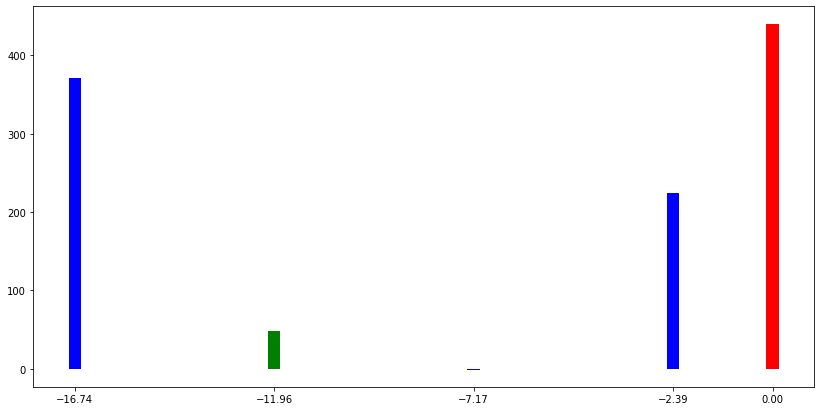

In [ ]:
interval_2 = sven(X1, S1)

In [ ]:
lmbd_2 = round(golden_section(interval_2, 0.01), 4)
printm('\lambda_1 = ' + str(lmbd_2))
X2 = Matrix([
    [round(x11.subs(lmbd, lmbd_2), 4)],
    [round(x12.subs(lmbd, lmbd_2), 4)]
])
printm('x^{(2)} = ' + L(X2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Метод ДСК-Пауелла

In [ ]:
def dsk_paul(x_dsk, fx_dsk, eps): 
    x1_dsk, x2_dsk, x3_dsk = x_dsk
    fx1_dsk, fx2_dsk, fx3_dsk = fx_dsk
    deltax_dsk = round(abs(x1_dsk - x2_dsk), 4)

    kvx = round(x2_dsk + (deltax_dsk * (fx1_dsk - fx3_dsk)) / (2*(fx1_dsk - 2*fx2_dsk + fx3_dsk)), 4)
    fkvx = f_value(x11.subs(lmbd, kvx), x12.subs(lmbd, kvx))
    while True:
        if abs(fx2_dsk - fkvx) <= eps and abs(x2_dsk - kvx) <= eps:
            # виконується критерій закінчення
            break
        else:
            if fkvx < fx2_dsk:
                if kvx > x2_dsk:
                    x1_dsk, x2_dsk = x2_dsk, kvx
                    fx1_dsk, fx2_dsk = fx2_dsk, fkvx
                else:
                    x2_dsk, x3_dsk = kvx, x2_dsk
                    fx2_dsk, fx3_dsk = fkvx, fx2_dsk
            else:
                if kvx > x2_dsk:
                    x3_dsk = kvx
                    fx3_dsk = fkvx
                else:
                    x1_dsk = kvx
                    fx1_dsk = fkvx
            a1 = (fx2_dsk - fx1_dsk) / (x2_dsk - x1_dsk)
            a2 = ((fx3_dsk-fx1_dsk)/(x3_dsk-x1_dsk) - (fx2_dsk-fx1_dsk)/(x2_dsk-x1_dsk)) / (x3_dsk - x2_dsk)
            kvx = (x1_dsk + x2_dsk) / 2 - (a1/(2*a2))
            fkvx = f_value(x11.subs(lmbd, kvx), x12.subs(lmbd, kvx))
    return kvx

In [ ]:
printm(r'x^{(3)} = x^{(2)} + \lambda_2 S^{(2)}')
printm(r'x^{(3)} = ' + L(X2) + r'+ \lambda_2' + L(S2))
printm(r'x^{(3)} = ' + L(X2 + lmbd * S2))
x11, x12 = X2 + lmbd * S2
printm(r'x_1^{(3)} = ' + L(x11))
printm(r'x_2^{(3)} = ' + L(x12))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

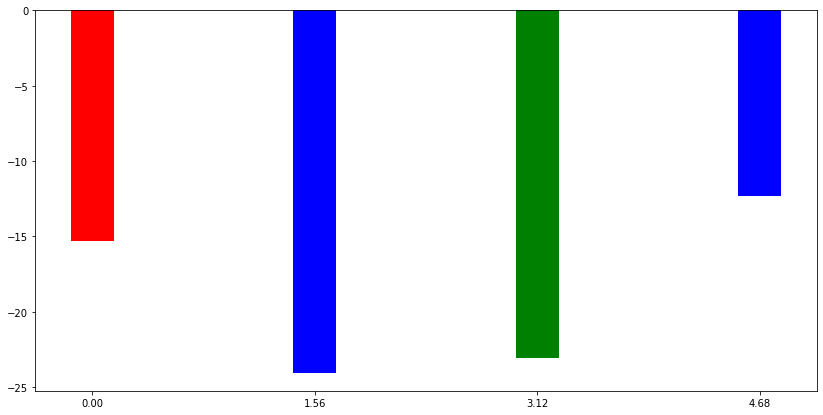

In [ ]:
x_dsk, fx_dsk = sven(X2, S2, dsk=True)

In [ ]:
lmbd_3 = round(dsk_paul(x_dsk, fx_dsk, 0.01), 4)
printm('\lambda_2 = ' + str(lmbd_3))
X3 = Matrix([
    [round(x11.subs(lmbd, lmbd_3), 4)],
    [round(x12.subs(lmbd, lmbd_3), 4)]
])
printm('x^{(3)} = ' + L(X3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
printm(r'x^{(4)} = x^{(3)} + \lambda_3 (x^{(3)} - x^{(1)})')
printm(r'x^{(4)} = ' + L(X3) + r'+ \lambda_3' + L(X3 - X1))
printm(r'x^{(4)} = ' + L(X3 + lmbd * (X3 - X1)))
x11, x12 = X3 + lmbd * (X3 - X1)
printm(r'x_1^{(4)} = ' + L(x11))
printm(r'x_2^{(4)} = ' + L(x12))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

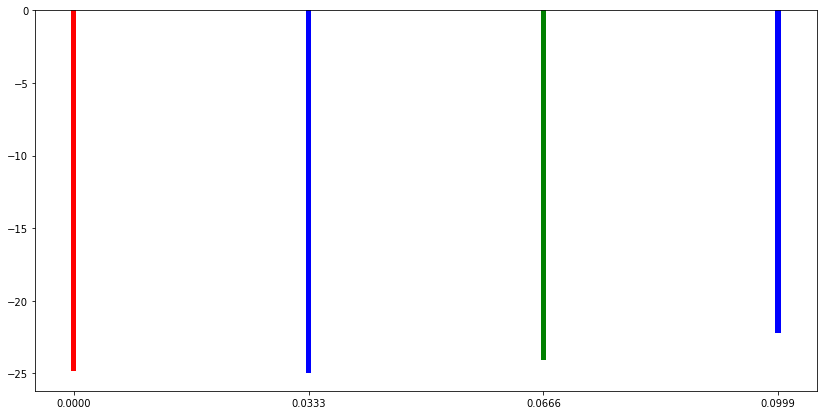

In [ ]:
x_dsk, fx_dsk = sven(X3, (X3 - X1), barwidth=0.0008, dsk=True)

In [ ]:
lmbd_4 = round(dsk_paul(x_dsk, fx_dsk, 0.01), 4)
printm('\lambda_3 = ' + str(lmbd_4))
X4 = Matrix([
    [round(x11.subs(lmbd, lmbd_4), 4)],
    [round(x12.subs(lmbd, lmbd_4), 4)]
])
printm('x^{(4)} = ' + L(X4))
printm('f(x^{(4)}) =' + L(f_value(X4[0], X4[1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Траекторія руху

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


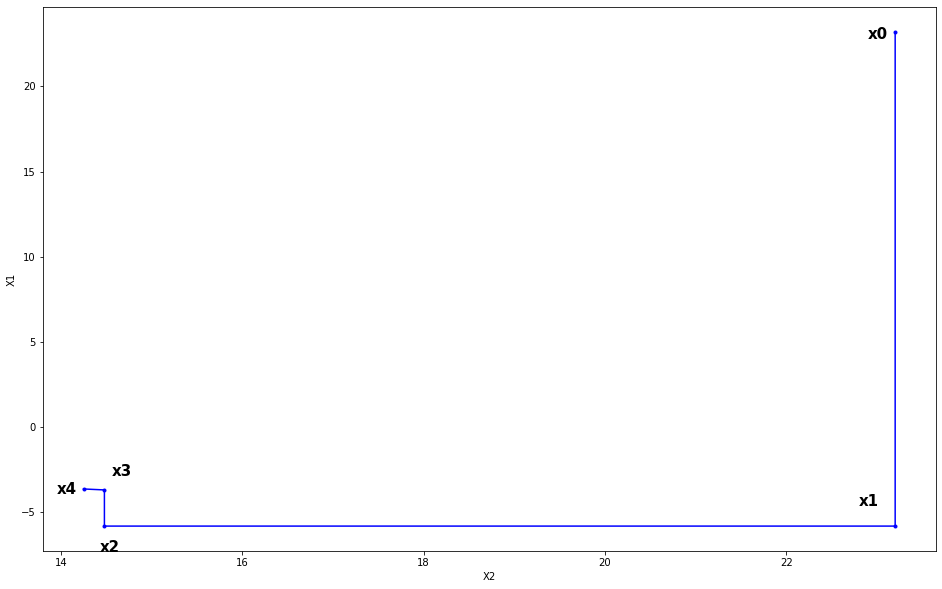

In [ ]:
plt.plot([X0[0], X1[0], X2[0], X3[0], X4[0]], [X0[1], X1[1], X2[1], X3[1], X4[1]], 'b.-')
plt.gcf().set_size_inches((16, 10))
plt.xlabel('X2')
plt.ylabel('X1')
ax = plt.gca()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
ax.text(X0[0] - 0.3, X0[1] - 0.4, 'x0', fontdict=font)
ax.text(X1[0] - 0.4, X1[1] + 1.2, 'x1', fontdict=font)
ax.text(X2[0] - 0.05, X2[1] - 1.5, 'x2', fontdict=font)
ax.text(X3[0] + 0.08, X3[1] + 0.8, 'x3', fontdict=font)
_ = ax.text(X4[0] - 0.3, X4[1] - 0.3, 'x4', fontdict=font)

## Про виконавця

**Казанцев Феофан КМ-82**

**Контактний номер**: 0952451345

E-mail: feofankazantsev@gmail.com

## Посилання 

https://www.youtube.com/playlist?list=PL7gJDv3ibRSg-h6KWuTOEwc77yEXw84OA
https://ami.nstu.ru/~headrd/seminar/publik_html/MO_conspect.pdf
https://studfile.net/preview/2026460/page:15/
https://uk.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D0%BF%D0%B5%D1%80%D0%B5%D1%82%D0%B8%D0%BD%D1%83